# Questions

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("insurance - insurance.csv")
display(df.head())
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?

## State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: Smokers have the same insurance charges than non-smokers

- Alternative Hypothesis: Smokers have higher insurance charges than non-smokers

## Select the correct test according to the data type and number of samples

- 2 Sample T-Test

## Test the assumptions of your selected test.

In [3]:
smoker_charges = df.loc[df["smoker"] == "yes", "charges"]
non_smoker_charges = df.loc[df["smoker"] == "no", "charges"]

In [4]:
# Testing for outliers

zscores_f = stats.zscore(smoker_charges)
outliers_f = abs(zscores_f) > 3
np.sum(outliers_f)

0

In [5]:
# Testing for outliers

zscores_f = stats.zscore(non_smoker_charges)
outliers_f = abs(zscores_f) > 3
np.sum(outliers_f)

24

In [6]:
# Removing outliers from non_smoker_charges

non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [7]:
# test for normality 

result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [8]:
# test for normality 

result_nonsmoker_charges = stats.normaltest(non_smoker_charges)
result_nonsmoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [9]:
# test for equal variance

result_equalvar = stats.levene(smoker_charges, non_smoker_charges)
result_equalvar

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

## Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [10]:
charges_result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
charges_result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

## Interpret your p-value and reject or fail to reject your null hypothesis 

- We reject the null-hypothesis and accept that smokers have higher insurance charges than non-smokers.

## Show a supporting visualization that helps display the result

<AxesSubplot: xlabel='smoker', ylabel='charges'>

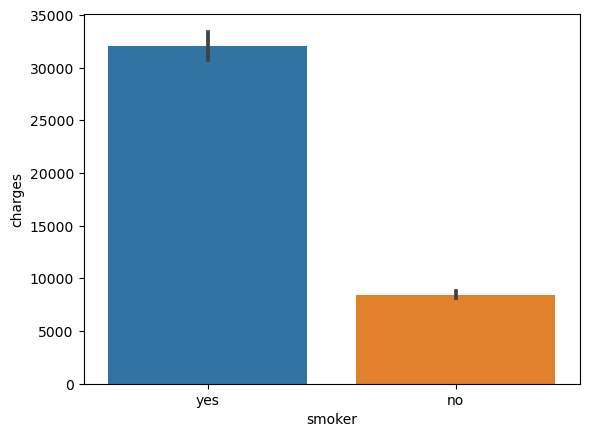

In [11]:
sns.barplot(data = df, x = "smoker", y = "charges")

# Are men more likely to smoke than women?

## State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: There is no significant difference in men and women who smoke.

- Alternative Hypothesis: Men are more likely to smoke than women

## Select the correct test according to the data type and number of samples

- Chi-Squared Test

## Test the assumptions of your selected test.

In [12]:
# contingency table

table = pd.crosstab(df["sex"], df["smoker"])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


## Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [13]:
# test with p-value

smoker_result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = smoker_result

print(p)
p<.05

0.006548143503580696


True

## Interpret your p-value and reject or fail to reject your null hypothesis 

- We reject the null hypothesis and we accept that men are more likely to smoke than women

## Show a supporting visualization that helps display the result

([<matplotlib.axis.XTick at 0x2994f77fc40>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

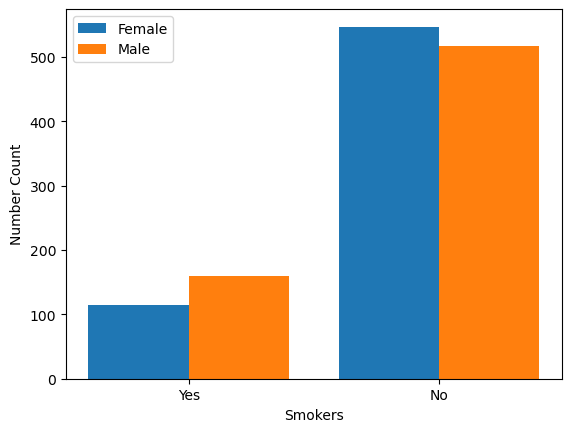

In [14]:
response = ["Yes", "No"]
x = [115, 547]
y = [159, 517]

X_axis = np.arange(len(response))

plt.bar(X_axis - 0.2, x, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, y, 0.4, label = 'Male')

plt.legend()
plt.xlabel("Smokers")
plt.ylabel("Number Count")
plt.xticks(X_axis, response)

# Do different regions have different charges, on average?

## State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: There is no significant difference in the average insurance charges between different regions.

- Alternative Hypothesis: Different regions have different charges, on average.

## Select the correct test according to the data type and number of samples

- ANOVA Test

## Test the assumptions of your selected test.

In [15]:
# Creating groups dictionary for the different regions.
groups = {}

## Loop through all unique categories
for i in df["region"].unique():
    ## Get series for group and rename
    data = df.loc[df["region"] == i, "charges"].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [16]:
## Running normal test on each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'normaltestresults': len(data), 'pvalue':p, 'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,normaltestresults,pvalue,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [17]:
# checking sig
norm_results_df['sig'] = norm_results_df['pvalue'] < .05 
norm_results_df

,normaltestresults,pvalue,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [18]:
stats.levene(groups["southwest"], groups["southeast"], groups["northwest"], groups["northeast"])

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

## Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [19]:
regions_result = stats.f_oneway( *groups.values())
regions_result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [20]:
# Tukey's Pairwise Multiple Comparisons Test

tukeys_results = pairwise_tukeyhsd(df["charges"], df["region"])
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


## Interpret your p-value and reject or fail to reject your null hypothesis 

- We reject the null hypothesis and accept that different regions have different charges on average.

## Show a supporting visualization that helps display the result

<AxesSubplot: xlabel='region', ylabel='charges'>

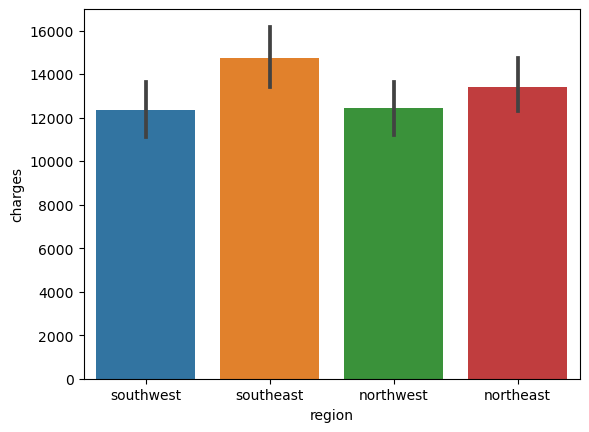

In [21]:
sns.barplot(data = df, x = "region", y = "charges")